<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/notebooks/05-data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>


# From Mess to Model: Mastering Data Preparation

This notebook accompanies the lecture and provides runnable examples covering:
- Data discovery & profiling  
- Cleaning (missing values, inconsistencies, duplicates, outliers)  
- Transformation (scaling, aggregation)  
- Feature engineering  
- A mini case study for customer churn preparation


## Setup: Loading Files into Colab environment

### **Method 1**: The Easiest Way (Using Google Colab)
If you are working in a Google Colab notebook, this is the simplest and most secure method. Colab is designed to integrate seamlessly with your Google Drive.

* **Step 1**: Mount Your Google Drive
Run the following code in a Colab cell. It will prompt you to authorize access to your Google Drive. You'll click a link, sign in to your Google account, and copy-paste the authorization code back into the cell.

* After this runs, you'll see a new drive folder in the file explorer on the left, which contains all of your Google Drive files.

* **Step 2**: Find the File Path
Navigate through the file explorer to find your desired file. Right-click on the file and select "Copy path".

* **Step 3**: Read the File with Pandas
Now, use the copied path inside the pd.read_csv() function.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#filepath to customers.csv file. /content/drive/MyDrive/BYU/CS 180/Data/customers.csv

In [2]:
import pandas as pd

# Paste the path you copied here
file_path = '/content/drive/MyDrive/BYU/CS 180/Data/customers.csv'

df = pd.read_csv(file_path)

# Display the first 5 rows to confirm it loaded correctly
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        12 non-null     int64  
 1   Name              12 non-null     object 
 2   Age               11 non-null     float64
 3   State             12 non-null     object 
 4   JoinDate          12 non-null     object 
 5   LastPurchaseDate  11 non-null     object 
 6   TotalSpend        12 non-null     int64  
 7   Income            11 non-null     float64
 8   Churn             12 non-null     int64  
 9   Address           12 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ KB


### **Method 2**: The Shareable Link Method (Works Anywhere)
This method works in any Python environment (like a local Jupyter Notebook or a script) and doesn't require installing special libraries, but it does require you to change the sharing settings of your file.

* **Step 1**: Share the File in Google Drive
Go to your Google Drive, right-click on worldcities.csv, and select Share. In the sharing settings, change the access from "Restricted" to "Anyone with the link".

* **Step 2**: Copy the Link and Extract the File ID
Copy the shareable link. It will look like this:
https://drive.google.com/file/d/SOME_LONG_FILE_ID/view?usp=sharing

The important part is the FILE_ID, which is the long string of characters between /d/ and /view.

* **Step 3**: Construct the Direct Download URL and Read with Pandas
You can use the FILE_ID to create a direct download link. The following Python code does this for you:

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Paste the FILE_ID you extracted from the shareable link
file_id = '1-qH2pQIP9LNe3XO6mxLH9wlbbfTlT-8W'

# This creates the direct download URL
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

# Display the first 5 rows to confirm it loaded correctly

print("Shape:",df.shape)
df.head()



## Introduction: Why Data Preparation?

> *Garbage in, garbage out.* Models cannot fix bad data.  
Data preparation typically consumes a large proportion of project time and directly impacts model accuracy and reliability.


## Step 1: Data Profiling

In [3]:

# Inspect structure, types, and missingness
df.info()
display(df.isna().sum())
df.describe()

# Random sample 5 of rows
df.sample(5, random_state=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        12 non-null     int64  
 1   Name              12 non-null     object 
 2   Age               11 non-null     float64
 3   State             12 non-null     object 
 4   JoinDate          12 non-null     object 
 5   LastPurchaseDate  11 non-null     object 
 6   TotalSpend        12 non-null     int64  
 7   Income            11 non-null     float64
 8   Churn             12 non-null     int64  
 9   Address           12 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ KB


,0
CustomerID,0
Name,0
Age,1
State,0
JoinDate,0
LastPurchaseDate,1
TotalSpend,0
Income,1
Churn,0
Address,0


,CustomerID,Name,Age,State,JoinDate,LastPurchaseDate,TotalSpend,Income,Churn,Address
6,107,Sam Patel,33.0,NY,2019-02-11,2021-03-01,600,46000.0,1,"3 Lake Dr, Buffalo, NY"
11,112,Emily White,22.0,NY,2022-09-14,2023-12-05,300,38000.0,1,"77 Broadway, New York, NY"
4,105,Maria Rossi,28.0,Calif.,2020-11-12,NaN,2000,61000.0,1,"88 Oak Blvd, San Diego, Calif."
10,111,David Brown,62.0,CA,2015-12-30,2024-03-22,25000,120000.0,0,"999 High St, Palo Alto, CA"
2,103,Ana Lopez,41.0,TX,2018-03-10,2022-12-15,5600,NaN,0,"9 1st Ave, Austin, TX"


## Step 2: Data Cleaning



### Missing Values

In [4]:
# Example strategies:
# 1) Deletion (listwise) — only when safe and small proportion missing
df_del = df.dropna(subset=['Age', 'Income'], how='any')
print("Listwise deletion shape:", df_del.shape)



Listwise deletion shape: (10, 10)


In [5]:
# 2) Deletion (column-wise) - when a large proportion is missing
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Identify columns with missing percentage greater than 10%
cols_to_drop = missing_percentage[missing_percentage > 10].index

# Drop these columns from the DataFrame
df_col_dropped = df.drop(columns=cols_to_drop)

print("Original shape:", df.shape)
print("Shape after dropping columns with >10% missing values:", df_col_dropped.shape)

Original shape: (12, 10)
Shape after dropping columns with >10% missing values: (12, 10)


In [6]:
# 3) Deletion (listwise) - only when safe and small proportion missing
df_del_any = df.dropna(how='any')
print("Listwise deletion (any NaN) shape:", df_del_any.shape)

Listwise deletion (any NaN) shape: (9, 10)


In [9]:
# 4) Simple imputation
df_imp = df.copy()
df_imp['Age'] = df_imp['Age'].fillna(df_imp['Age'].median())
df_imp['Income'] = df_imp['Income'].fillna(df_imp['Income'].median())
df_imp[['Age','Income']].head(10)

,Age,Income
0,29.0,55000.0
1,35.0,72000.0
2,41.0,61000.0
3,35.0,49000.0
4,28.0,61000.0
5,52.0,88000.0
6,33.0,46000.0
7,29.0,55000.0
8,47.0,99000.0
9,38.0,72000.0


In [ ]:
# 5) Predictive imputation can be done with models (skipped for brevity here)


### Inaccurate & Inconsistent Data

In [10]:
df_imp['State'].unique()

array(['CA', 'California', 'TX', 'NY', 'Calif.'], dtype=object)

In [11]:
# Standardize State column (CA, California, Calif. -> CA)
state_map = {'California': 'CA', 'Calif.': 'CA'}
df_imp['State'] = df_imp['State'].replace(state_map)
df_imp['State'].unique()

array(['CA', 'TX', 'NY'], dtype=object)

In [12]:
display(df_imp[['JoinDate','LastPurchaseDate']].head(10))

,JoinDate,LastPurchaseDate
0,2020-01-15,2023-11-01
1,2019-06-20,2024-02-10
2,2018-03-10,2022-12-15
3,2021-07-05,2023-07-30
4,2020-11-12,NaN
5,2017-09-22,2023-05-18
6,2019-02-11,2021-03-01
7,2020-01-15,2023-11-01
8,2016-05-17,2024-01-02
9,2021-04-23,2023-02-12


In [13]:
# Ensure dates are parsed and consistent

df_imp['JoinDate'] = pd.to_datetime(df_imp['JoinDate'], errors='coerce')
df_imp['LastPurchaseDate'] = pd.to_datetime(df_imp['LastPurchaseDate'], errors='coerce')
df_imp.info()
df_imp[['JoinDate','LastPurchaseDate']].head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        12 non-null     int64         
 1   Name              12 non-null     object        
 2   Age               12 non-null     float64       
 3   State             12 non-null     object        
 4   JoinDate          12 non-null     datetime64[ns]
 5   LastPurchaseDate  11 non-null     datetime64[ns]
 6   TotalSpend        12 non-null     int64         
 7   Income            12 non-null     float64       
 8   Churn             12 non-null     int64         
 9   Address           12 non-null     object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 1.1+ KB


,JoinDate,LastPurchaseDate
0,2020-01-15,2023-11-01
1,2019-06-20,2024-02-10
2,2018-03-10,2022-12-15
3,2021-07-05,2023-07-30
4,2020-11-12,NaT
5,2017-09-22,2023-05-18
6,2019-02-11,2021-03-01
7,2020-01-15,2023-11-01
8,2016-05-17,2024-01-02
9,2021-04-23,2023-02-12


In [14]:
df_imp['Name'].head(10)

,Name
0,Jane Doe
1,John Smith
2,Ana Lopez
3,Wei Chen
4,Maria Rossi
5,Tom Lee
6,Sam Patel
7,Linda Kim
8,Ali Khan
9,Sarah Green


In [15]:
# Trim/canonicalize text fields (example: Name)
df_imp['Name'] = df_imp['Name'].str.strip()

df_imp[['State','JoinDate','LastPurchaseDate','Name']].head(10)

,State,JoinDate,LastPurchaseDate,Name
0,CA,2020-01-15,2023-11-01,Jane Doe
1,CA,2019-06-20,2024-02-10,John Smith
2,TX,2018-03-10,2022-12-15,Ana Lopez
3,NY,2021-07-05,2023-07-30,Wei Chen
4,CA,2020-11-12,NaT,Maria Rossi
5,TX,2017-09-22,2023-05-18,Tom Lee
6,NY,2019-02-11,2021-03-01,Sam Patel
7,CA,2020-01-15,2023-11-01,Linda Kim
8,TX,2016-05-17,2024-01-02,Ali Khan
9,CA,2021-04-23,2023-02-12,Sarah Green


### Duplicates

In [16]:

# Count duplicates (all columns)
dup_count = df_imp.duplicated().sum()
print("Exact duplicate rows:", dup_count)

Exact duplicate rows: 0


In [ ]:
# Identify potential dupes by a key subset (e.g., Name + JoinDate + State)
subset_dupes = df_imp.duplicated(subset=['Name','JoinDate','State']).sum()
print("Subset-based duplicate rows:", subset_dupes)

In [17]:
# Drop exact duplicates
df_nodup = df_imp.drop_duplicates()
df_nodup.shape

(12, 10)

### Outliers (Z-score & IQR)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Z-score method for TotalSpend
ts = df_nodup['TotalSpend']
z = (ts - ts.mean()) / ts.std(ddof=0)
outlier_idx = np.where(np.abs(z) > 3)[0]
print("Z-score outlier indices (|z| > 3):", outlier_idx.tolist())



Z-score outlier indices (|z| > 3): []


In [19]:
# IQR method
Q1, Q3 = ts.quantile(0.25), ts.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
iqr_outliers = df_nodup[(ts < lower) | (ts > upper)]
print("IQR outliers:")
display(iqr_outliers[['CustomerID','Name','TotalSpend']])


IQR outliers:


,CustomerID,Name,TotalSpend
5,106,Tom Lee,15000
10,111,David Brown,25000


In [20]:
# Option: cap outliers at bounds (winsorization-style)
df_capped = df_nodup.copy()
df_capped['TotalSpend_capped'] = df_capped['TotalSpend'].clip(lower=lower, upper=upper)


/tmp/ipython-input-3152431479.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_nodup['TotalSpend'].values, df_capped['TotalSpend_capped'].values], labels=['Raw','Capped'])


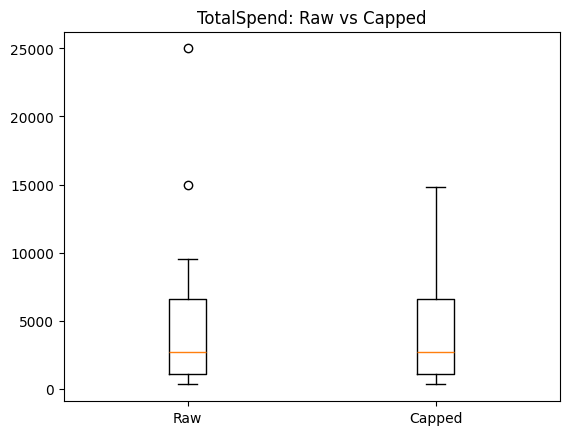

In [21]:
# Quick boxplot before/after (for class visualization)
plt.figure()
plt.boxplot([df_nodup['TotalSpend'].values, df_capped['TotalSpend_capped'].values], labels=['Raw','Capped'])
plt.title('TotalSpend: Raw vs Capped')
plt.show()

## Step 3: Data Transformation

### Normalization (Min-Max) vs Standardization (Z-score)

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scale_df = df_capped[['Income','TotalSpend_capped']].dropna().copy()

# Min-Max Scaling
mm = MinMaxScaler()
scale_df['Income_MinMax'] = mm.fit_transform(scale_df[['Income']])
scale_df.head(10)


,Income,TotalSpend_capped,Income_MinMax
0,55000.0,1200.0,0.207317
1,72000.0,3400.0,0.414634
2,61000.0,5600.0,0.280488
3,49000.0,800.0,0.134146
4,61000.0,2000.0,0.280488
5,88000.0,14787.5,0.609756
6,46000.0,600.0,0.097561
7,55000.0,1200.0,0.207317
8,99000.0,9500.0,0.743902
9,72000.0,4000.0,0.414634


In [23]:
# Standardization
ss = StandardScaler()
scale_df['Income_Standard'] = ss.fit_transform(scale_df[['Income']])
scale_df.head(10)

,Income,TotalSpend_capped,Income_MinMax,Income_Standard
0,55000.0,1200.0,0.207317,-0.568360
1,72000.0,3400.0,0.414634,0.174880
2,61000.0,5600.0,0.280488,-0.306040
3,49000.0,800.0,0.134146,-0.830680
4,61000.0,2000.0,0.280488,-0.306040
5,88000.0,14787.5,0.609756,0.874400
6,46000.0,600.0,0.097561,-0.961840
7,55000.0,1200.0,0.207317,-0.568360
8,99000.0,9500.0,0.743902,1.355319
9,72000.0,4000.0,0.414634,0.174880


### Data Aggregation (monthly sales example)

In [24]:

# Aggregate by month using LastPurchaseDate and TotalSpend
agg = df_capped.dropna(subset=['LastPurchaseDate']).copy()
agg['Month'] = agg['LastPurchaseDate'].dt.to_period('M')
monthly_sales = agg.groupby('Month', as_index=False)['TotalSpend'].sum()

print("Monthly sales (sum of TotalSpend by last purchase month):")
display(monthly_sales)



Monthly sales (sum of TotalSpend by last purchase month):


,Month,TotalSpend
0,2021-03,600
1,2022-12,5600
2,2023-02,4000
3,2023-05,15000
4,2023-07,800
5,2023-11,2400
6,2023-12,300
7,2024-01,9500
8,2024-02,3400
9,2024-03,25000


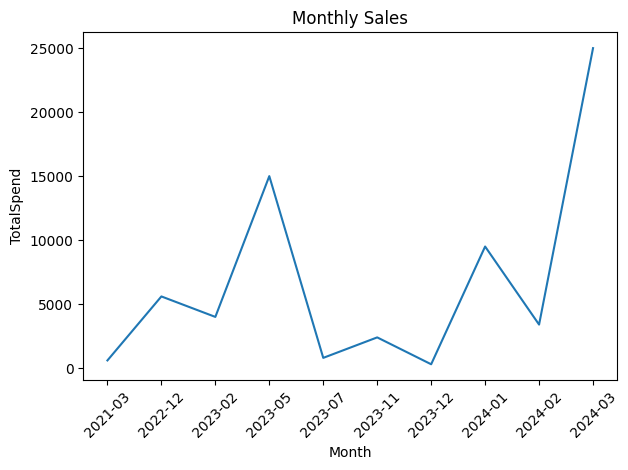

In [25]:
# Simple plot
plt.figure()
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['TotalSpend'])
plt.xticks(rotation=45)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('TotalSpend')
plt.tight_layout()
plt.show()


### Feature Engineering

In [26]:
fe = df_capped.copy()

# Day of week from LastPurchaseDate
fe['DayOfWeek'] = fe['LastPurchaseDate'].dt.day_name()

# Days since last purchase (relative to "today")
today = pd.Timestamp.today().normalize()
fe['DaysSinceLastPurchase'] = (today - fe['LastPurchaseDate']).dt.days

# Simple CLV proxy: average monthly spend over recency (protect against div by zero)
fe['MonthsSinceLastPurchase'] = np.maximum(fe['DaysSinceLastPurchase'] / 30.0, 1.0)
fe['CLV_proxy'] = fe['TotalSpend'] / fe['MonthsSinceLastPurchase']

fe[['CustomerID','Name','DayOfWeek','DaysSinceLastPurchase','CLV_proxy']].head(10)


,CustomerID,Name,DayOfWeek,DaysSinceLastPurchase,CLV_proxy
0,101,Jane Doe,Wednesday,692.0,52.023121
1,102,John Smith,Saturday,591.0,172.588832
2,103,Ana Lopez,Thursday,1013.0,165.844028
3,104,Wei Chen,Sunday,786.0,30.534351
4,105,Maria Rossi,NaN,NaN,NaN
5,106,Tom Lee,Thursday,859.0,523.864959
6,107,Sam Patel,Monday,1667.0,10.797840
7,108,Linda Kim,Wednesday,692.0,52.023121
8,109,Ali Khan,Tuesday,630.0,452.380952
9,110,Sarah Green,Sunday,954.0,125.786164


## Mini Case Study: Preparing Customer Data for Churn

In [27]:
# Start from raw
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw= pd.read_csv(file_path)

# Profile the data
raw.head()
raw.info()
raw.describe()
raw.isnull().sum()

# 1) Make categorical names consistent and convert dates (stings) to datetime
raw['State'] = raw['State'].replace({'California':'CA','Calif.':'CA'})
raw['JoinDate'] = pd.to_datetime(raw['JoinDate'], errors='coerce')
raw['LastPurchaseDate'] = pd.to_datetime(raw['LastPurchaseDate'], errors='coerce')

# 2) Impute numeric columns (median)
for col in ['Age','Income']:
    raw[col] = raw[col].fillna(raw[col].median())

# 3) Handle missing LastPurchaseDate: fill with JoinDate as fallback (domain choice for demo)
raw['LastPurchaseDate'] = raw['LastPurchaseDate'].fillna(raw['JoinDate'])

# 4) Remove duplicates
clean = raw.drop_duplicates()

# 5) Feature engineering
today = pd.Timestamp.today().normalize()
clean['DaysSinceLastPurchase'] = (today - clean['LastPurchaseDate']).dt.days
clean['TenureDays'] = (today - clean['JoinDate']).dt.days
clean['AvgMonthlySpend'] = clean['TotalSpend'] / np.maximum(clean['TenureDays']/30.0, 1.0)

# Simple CLV proxy: AvgMonthlySpend * 6 months horizon
clean['CustomerLifetimeValue_6mo'] = clean['AvgMonthlySpend'] * 6

# 6) Scaling selected features (for model input)
for_scale = clean[['Income','TotalSpend','DaysSinceLastPurchase','TenureDays','CustomerLifetimeValue_6mo']].copy()
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(for_scale), columns=[c + "_z" for c in for_scale.columns])

model_input = pd.concat([clean[['CustomerID','Churn','State']], scaled], axis=1)
model_input.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        12 non-null     int64  
 1   Name              12 non-null     object 
 2   Age               11 non-null     float64
 3   State             12 non-null     object 
 4   JoinDate          12 non-null     object 
 5   LastPurchaseDate  11 non-null     object 
 6   TotalSpend        12 non-null     int64  
 7   Income            11 non-null     float64
 8   Churn             12 non-null     int64  
 9   Address           12 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ KB


,CustomerID,Churn,State,Income_z,TotalSpend_z,DaysSinceLastPurchase_z,TenureDays_z,CustomerLifetimeValue_6mo_z
0,101,0,CA,-0.568360,-0.630927,-0.548402,-0.300408,-0.712731
1,102,1,CA,0.174880,-0.323612,-0.807631,-0.011408,-0.264125
2,103,0,TX,-0.306040,-0.016297,0.275484,0.634348,0.005647
3,104,0,NY,-0.830680,-0.686803,-0.307139,-1.042958,-0.741514
4,105,1,CA,-0.306040,-0.519176,2.233819,-0.718006,-0.442020
5,106,0,TX,0.874400,1.296777,-0.119776,0.868037,1.534401
6,107,1,NY,-0.961840,-0.714741,1.954057,0.166970,-0.875131
7,108,0,CA,-0.568360,-0.630927,-0.548402,-0.300408,-0.712731
8,109,0,TX,1.355319,0.528489,-0.707533,1.549746,0.374537
9,110,1,CA,0.174880,-0.239799,0.124054,-0.942016,0.225172



## Conclusion & Key Takeaways

- Data preparation is iterative: profile → clean → transform → engineer → (repeat as needed).  
- Document your assumptions and choices (e.g., why you imputed a value a certain way).  
- High-quality preparation underpins trustworthy, impactful models.
